In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# Clustering and Pipelines
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline

# Rebalancing data
from imblearn.over_sampling  import SMOTE
from collections import Counter

# Saving
import pickle

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [8]:
df_eda = pd.read_csv("../data/processed/df_eda.csv")
df_eda.head()

Patient_Age  Mother_inherit  Father_inherit  Blood_cell_count  Mother_age   
0          2.0             1.0             0.0          4.760603   34.886364  \
1          6.0             1.0             0.0          4.893297   41.000000   
2         12.0             1.0             0.0          4.705280   21.000000   
3         11.0             1.0             0.0          4.720703   32.000000   
4         14.0             1.0             0.0          5.103188   34.601513   

   Father_age  Status  Respiratory_rate  Heart_rate  Follow_up  ...   
0   42.378320     0.0               0.0         0.0        0.0  ...  \
1   22.000000     0.0               0.0         1.0        1.0  ...   
2   41.706436     1.0               1.0         0.0        0.0  ...   
3   40.742424     0.0               1.0         1.0        1.0  ...   
4   42.015587     1.0               0.0         0.0        1.0  ...   

   Birth_defects  WBC_count  Blood_test  Symptom1  Symptom2  Symptom3   
0            0.0   9.857562         3.0       1.0       1.0       1.0  \
1            1.0   7.474796         2.0       0.0       1.0       1.0   
2            1.0   7.919321         1.0       0.0       0.0       1.0   
3            0.0   4.098210         3.0       0.0       0.0       0.0   
4            0.0  10.272230         2.0       1.0       0.0       0.0   

   Symptom4  Symptom5  Genetic_disorder  Disorder_subclass  
0       1.0       1.0               0.0                5.0  
1       1.0       1.0               1.0                3.0  
2       0.0       0.0               0.0                6.0  
3       0.0       0.0               1.0                1.0  
4       1.0       0.0               2.0                2.0  

[5 rows x 27 columns]

In [9]:
# This dataset aims to predict both the genetic disorder and disorder subclass of patients, so we will make two dataframes for each target column.
Genetic_disorder = df_eda.drop(["Disorder_subclass"], axis=1)
Disorder_subclass = df_eda.drop(["Genetic_disorder"], axis=1)

## Divide datasets into train and test

Genetic disorder dataframe

In [10]:
# Split target column from the rest of the columns of the Genetic_disorder dataframe
Genetic_X = Genetic_disorder.drop(["Genetic_disorder"], axis=1)
Genetic_Y = Genetic_disorder["Genetic_disorder"]

In [11]:
# Normalize the data
Genetic_X_scaled = StandardScaler().fit_transform(Genetic_X)

In [12]:
# Divide dataframe into train and test sets
X_Gen_train, X_Gen_test, y_Gen_train, y_Gen_test = train_test_split(Genetic_X_scaled, Genetic_Y, test_size=0.2, random_state=42)

Disorder subclass dataframe

In [13]:
# Split target column from the rest of the columns of the Disorder_subclass dataframe
Subclass_X = Disorder_subclass.drop(["Disorder_subclass"], axis=1)
Subclass_Y = Disorder_subclass["Disorder_subclass"]

In [14]:
# Normalize the data
Subclass_X_scaled = StandardScaler().fit_transform(Subclass_X)

In [15]:
# Divide dataframe into train and test sets
X_Sub_train, X_Sub_test, y_Sub_train, y_Sub_test = train_test_split(Subclass_X_scaled, Subclass_Y, test_size=0.2, random_state=42)

## Model training

In [38]:
# Load all models
log = LogisticRegression(solver="lbfgs", random_state=42)
tree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()
svm = SVC(random_state=42)
bag_clf = BaggingClassifier(base_estimator=tree, n_estimators=500, max_samples=100, bootstrap=True, random_state=42)
ada_clf = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.5, random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
cat = CatBoostClassifier(random_state=42)
lgb = LGBMClassifier(random_state=42)


# List of models
models = [log, tree, knn, nb, svm, bag_clf, ada_clf, rf, gb, xgb, cat, lgb]

#### Train and predict with Genetic_disorder dataframe

In [39]:
log.fit(X_Gen_train, y_Gen_train)
tree.fit(X_Gen_train, y_Gen_train)
knn.fit(X_Gen_train, y_Gen_train)
nb.fit(X_Gen_train, y_Gen_train)
svm.fit(X_Gen_train, y_Gen_train)
bag_clf.fit(X_Gen_train, y_Gen_train)
ada_clf.fit(X_Gen_train, y_Gen_train)
rf.fit(X_Gen_train, y_Gen_train)
gb.fit(X_Gen_train, y_Gen_train)
xgb.fit(X_Gen_train, y_Gen_train)
cat.fit(X_Gen_train, y_Gen_train)
lgb.fit(X_Gen_train, y_Gen_train)

Learning rate set to 0.090669
0:	learn: 1.0408151	total: 6.92ms	remaining: 6.91s
1:	learn: 0.9908024	total: 16.3ms	remaining: 8.11s
2:	learn: 0.9462192	total: 22ms	remaining: 7.32s
3:	learn: 0.9134017	total: 27.5ms	remaining: 6.83s
4:	learn: 0.8881744	total: 32.6ms	remaining: 6.48s
5:	learn: 0.8624017	total: 36.6ms	remaining: 6.06s
6:	learn: 0.8356583	total: 40.8ms	remaining: 5.79s
7:	learn: 0.8177785	total: 45.3ms	remaining: 5.62s
8:	learn: 0.7969046	total: 49.6ms	remaining: 5.46s
9:	learn: 0.7817538	total: 54ms	remaining: 5.34s
10:	learn: 0.7651123	total: 58.5ms	remaining: 5.26s
11:	learn: 0.7518212	total: 64ms	remaining: 5.27s
12:	learn: 0.7399211	total: 68.8ms	remaining: 5.23s
13:	learn: 0.7281679	total: 73.8ms	remaining: 5.2s
14:	learn: 0.7156329	total: 79.1ms	remaining: 5.2s
15:	learn: 0.7059130	total: 84.4ms	remaining: 5.19s
16:	learn: 0.6957569	total: 89.3ms	remaining: 5.16s
17:	learn: 0.6854893	total: 94.7ms	remaining: 5.17s
18:	learn: 0.6744007	total: 99.8ms	remaining: 5.15s


LGBMClassifier(random_state=42)

In [40]:
lst_models = []
lst_accuracy = []
lst_precision = []
lst_recall = []
lst_f1 = []
lst_cvs = []


for model in models:
    name = model.__class__.__name__
    prediction = model.predict(X_Gen_test)
    accuracy = metrics.accuracy_score(y_Gen_test, prediction)
    precision = precision_score(y_Gen_test, prediction, average="weighted")
    recall = recall_score(y_Gen_test, prediction, average="weighted")
    f1 = f1_score(y_Gen_test, prediction, average="weighted")
    CVS = cross_val_score(model,X_Gen_test,y_Gen_test,cv=10,verbose=False).mean()

    lst_models.append(name)
    lst_accuracy.append(accuracy)
    lst_precision.append(precision)
    lst_recall.append(recall)
    lst_f1.append(f1)
    lst_cvs.append(CVS)
    
    print("-"*(len(name)+2))
    print("|"+ name + "|")
    print("-"*(len(name)+2))
    print("Accuracy: " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))
    print("F1 Score: " + str(f1))
    print("Cross Validation Score mean: " + str(CVS*100))
    print("--------------------------------------------------------------------------")
    print("")


--------------------
|LogisticRegression|
--------------------
Accuracy: 0.5326869806094183
Precision: 0.5370433419283454
Recall: 0.5326869806094183
F1 Score: 0.40124404578954775
Cross Validation Score mean: 52.714681440443215
--------------------------------------------------------------------------

------------------------
|DecisionTreeClassifier|
------------------------
Accuracy: 0.6720221606648199
Precision: 0.6763762734781247
Recall: 0.6720221606648199
F1 Score: 0.6736742918205236
Cross Validation Score mean: 65.34626038781164
--------------------------------------------------------------------------

----------------------
|KNeighborsClassifier|
----------------------
Accuracy: 0.4922437673130194
Precision: 0.47416631504712764
Recall: 0.4922437673130194
F1 Score: 0.47705577410715677
Cross Validation Score mean: 49.61218836565096
--------------------------------------------------------------------------

------------
|GaussianNB|
------------
Accuracy: 0.5365650969529085
Precisi

In [41]:
results_df = pd.DataFrame([lst_models, lst_accuracy, lst_precision, lst_recall,
lst_f1, lst_cvs]).T.rename(columns={0: "Models", 1: "Accuracy", 2: "Precision", 3: "Recall", 4: "F1 Score", 5: "CVS"})
for col in ["Accuracy", "Precision", "Recall", "F1 Score", "CVS"]:
    results_df[col] = results_df[col].astype(float)

results_df.sort_values(by="CVS", inplace=True, ascending=False)
results_df

Models  Accuracy  Precision    Recall  F1 Score   
8   GradientBoostingClassifier  0.759557   0.791850  0.759557  0.747388  \
10          CatBoostClassifier  0.774792   0.773201  0.774792  0.771495   
9                XGBClassifier  0.761219   0.759584  0.761219  0.758210   
11              LGBMClassifier  0.771745   0.773600  0.771745  0.767539   
7       RandomForestClassifier  0.730748   0.733705  0.730748  0.721513   
5            BaggingClassifier  0.670083   0.724497  0.670083  0.625067   
6           AdaBoostClassifier  0.674792   0.677998  0.674792  0.676080   
1       DecisionTreeClassifier  0.672022   0.676376  0.672022  0.673674   
4                          SVC  0.572299   0.556354  0.572299  0.529738   
0           LogisticRegression  0.532687   0.537043  0.532687  0.401244   
3                   GaussianNB  0.536565   0.598643  0.536565  0.412475   
2         KNeighborsClassifier  0.492244   0.474166  0.492244  0.477056   

         CVS  
8   0.733795  
10  0.724100  
9   0.722992  
11  0.721053  
7   0.701108  
5   0.672853  
6   0.660111  
1   0.653463  
4   0.547368  
0   0.527147  
3   0.524931  
2   0.496122

The best model for this target seems to be GradientBoostingClassifier which implies the following scores:
- Accuracy: 0.76
- Precision: 0.79
- Recall: 0.76
- F1 Score: 0.75
- Cross Validation Score mean (mean, cv=10): 0.73

In [42]:
metrics_df = results_df.set_index("Models").T
metrics_df

Models     GradientBoostingClassifier  CatBoostClassifier  XGBClassifier   
Accuracy                     0.759557            0.774792       0.761219  \
Precision                    0.791850            0.773201       0.759584   
Recall                       0.759557            0.774792       0.761219   
F1 Score                     0.747388            0.771495       0.758210   
CVS                          0.733795            0.724100       0.722992   

Models     LGBMClassifier  RandomForestClassifier  BaggingClassifier   
Accuracy         0.771745                0.730748           0.670083  \
Precision        0.773600                0.733705           0.724497   
Recall           0.771745                0.730748           0.670083   
F1 Score         0.767539                0.721513           0.625067   
CVS              0.721053                0.701108           0.672853   

Models     AdaBoostClassifier  DecisionTreeClassifier       SVC   
Accuracy             0.674792                0.672022  0.572299  \
Precision            0.677998                0.676376  0.556354   
Recall               0.674792                0.672022  0.572299   
F1 Score             0.676080                0.673674  0.529738   
CVS                  0.660111                0.653463  0.547368   

Models     LogisticRegression  GaussianNB  KNeighborsClassifier  
Accuracy             0.532687    0.536565              0.492244  
Precision            0.537043    0.598643              0.474166  
Recall               0.532687    0.536565              0.492244  
F1 Score             0.401244    0.412475              0.477056  
CVS                  0.527147    0.524931              0.496122

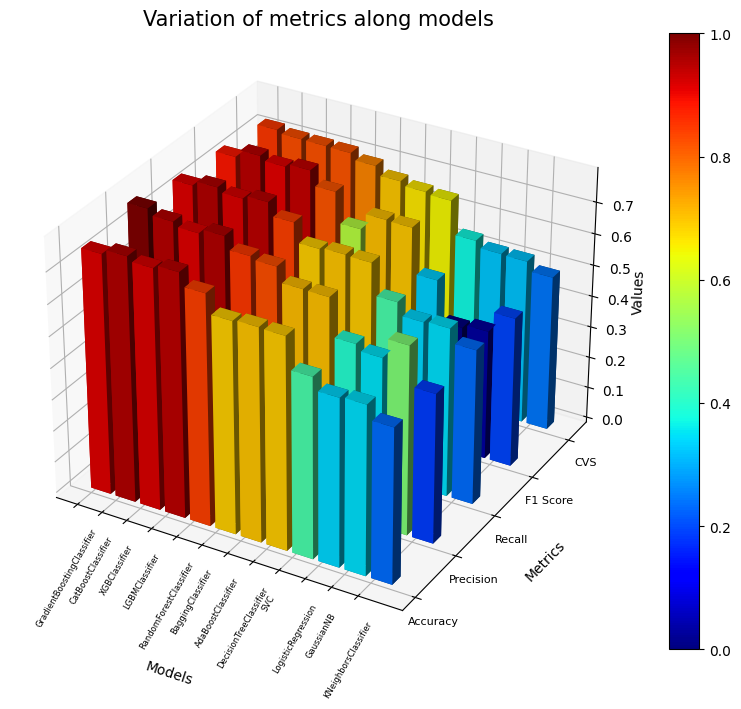

<Figure size 1500x600 with 0 Axes>

In [43]:
x = np.arange(12)
y = np.arange(5)
xpos,ypos = np.meshgrid(x,y)
z = metrics_df.to_numpy()

xpos=xpos.flatten()
ypos=ypos.flatten()
zpos=np.zeros_like(xpos)

dx=0.8*np.ones_like(xpos)
dy=0.2*np.ones_like(xpos)
dz=z.flatten()

fig=plt.figure(figsize = (11,8))
ax=fig.add_subplot(111, projection = "3d")
label = ["Values"]

ax.set_title("Variation of metrics along models", fontsize = 15)
ax.set_xticks(range(12))
ax.set_xticklabels(metrics_df.columns, fontsize = 6, rotation=60)
ax.set_xlabel("Models", labelpad=40)

ax.set_yticklabels(metrics_df.index, fontsize = 8)
ax.set_yticks(range(5))
ax.set_ylabel("Metrics",labelpad=10)

ax.set_zlabel("Values", labelpad=0)
colors = plt.cm.jet((z.flatten() - z.min()).astype(float) / (z.max() - z.min()))

bar = ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color= colors)

plt.figure(figsize=(15,6))
fig.colorbar(plt.cm.ScalarMappable(cmap = 'jet'), ax = ax)

plt.show()

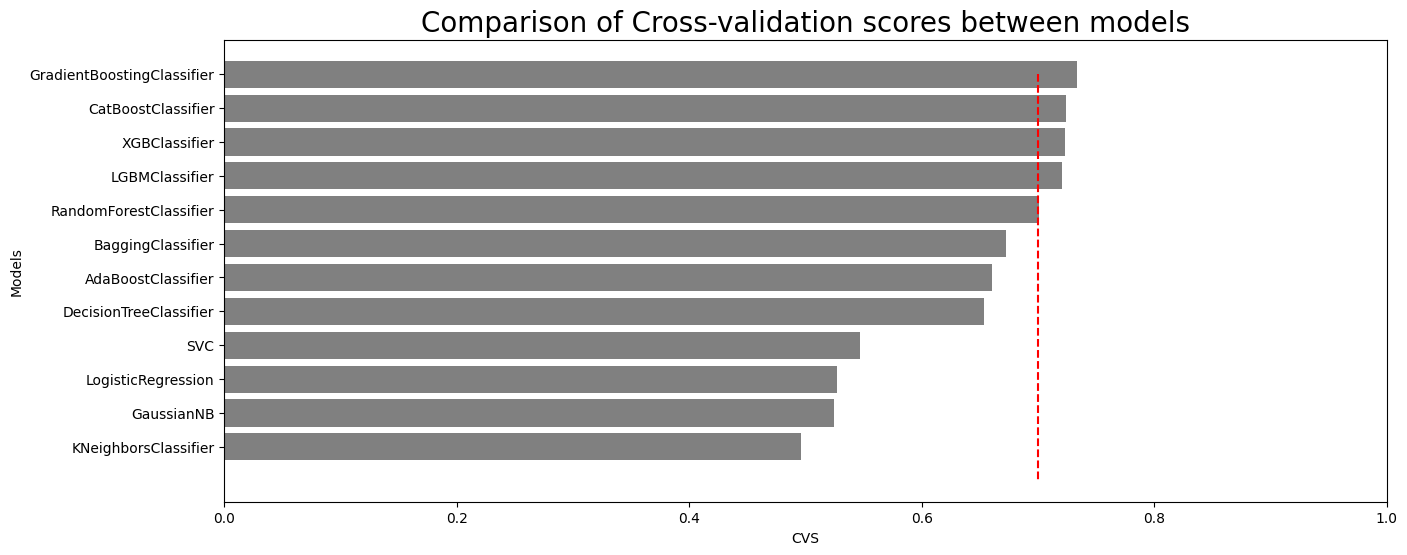

In [45]:
figure = plt.figure(figsize=(15,6))   
sns.barplot(x="CVS", y="Models", data=results_df, color="grey")
plt.xlabel("CVS")
plt.ylabel("Models")
plt.xlim(0,1)
plt.vlines(0.7, ymin=0, ymax=12, color='red', linestyle='--')
plt.title("Comparison of Cross-validation scores between models", size=20)
plt.show()

# Vertical line aims to highlight the best models (CVS >= 70%)

<b>Evaluation with Confusion matrix and ROC curves</b>

In [46]:
gb_pred = gb.predict(X_Gen_test)

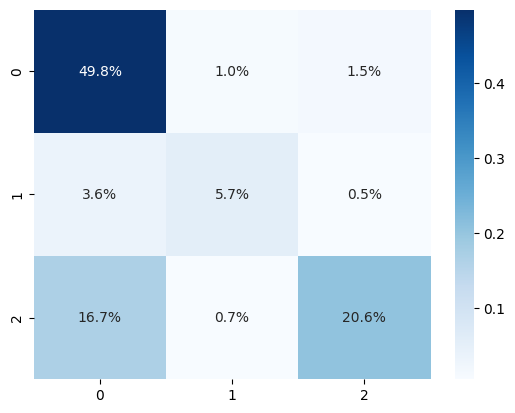

In [47]:
c_matrix = confusion_matrix(y_Gen_test, gb_pred)
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, fmt='.1%', cmap='Blues');

#### Train and predict with Disorder_subclass dataframe

In [48]:
log.fit(X_Sub_train, y_Sub_train)
tree.fit(X_Sub_train, y_Sub_train)
knn.fit(X_Sub_train, y_Sub_train)
nb.fit(X_Sub_train, y_Sub_train)
svm.fit(X_Sub_train, y_Sub_train)
bag_clf.fit(X_Sub_train, y_Sub_train)
ada_clf.fit(X_Sub_train, y_Sub_train)
rf.fit(X_Sub_train, y_Sub_train)
gb.fit(X_Sub_train, y_Sub_train)
xgb.fit(X_Sub_train, y_Sub_train)
cat.fit(X_Sub_train, y_Sub_train)
lgb.fit(X_Sub_train, y_Sub_train)

Learning rate set to 0.090669
0:	learn: 2.0494723	total: 24.6ms	remaining: 24.6s
1:	learn: 1.9330301	total: 50.4ms	remaining: 25.2s
2:	learn: 1.8339325	total: 72.6ms	remaining: 24.1s
3:	learn: 1.7671559	total: 90.3ms	remaining: 22.5s
4:	learn: 1.7036333	total: 109ms	remaining: 21.6s
5:	learn: 1.6480520	total: 127ms	remaining: 21.1s
6:	learn: 1.5979315	total: 146ms	remaining: 20.7s
7:	learn: 1.5409207	total: 165ms	remaining: 20.5s
8:	learn: 1.4993617	total: 184ms	remaining: 20.2s
9:	learn: 1.4621887	total: 203ms	remaining: 20.1s
10:	learn: 1.4304002	total: 222ms	remaining: 19.9s
11:	learn: 1.3931754	total: 240ms	remaining: 19.8s
12:	learn: 1.3624743	total: 260ms	remaining: 19.7s
13:	learn: 1.3441321	total: 280ms	remaining: 19.7s
14:	learn: 1.3199309	total: 301ms	remaining: 19.8s
15:	learn: 1.2964248	total: 323ms	remaining: 19.9s
16:	learn: 1.2760386	total: 344ms	remaining: 19.9s
17:	learn: 1.2571723	total: 365ms	remaining: 19.9s
18:	learn: 1.2347208	total: 385ms	remaining: 19.9s
19:	lea

LGBMClassifier(random_state=42)

In [51]:
lst_sub_models = []
lst_sub_accuracy = []
lst_sub_precision = []
lst_sub_recall = []
lst_sub_f1 = []
lst_sub_cvs = []


for model in models:
    name = model.__class__.__name__
    prediction = model.predict(X_Sub_test)
    accuracy = metrics.accuracy_score(y_Sub_test, prediction)
    precision = precision_score(y_Sub_test, prediction, average="weighted")
    recall = recall_score(y_Sub_test, prediction, average="weighted")
    f1 = f1_score(y_Sub_test, prediction, average="weighted")
    CVS = cross_val_score(model,X_Sub_test,y_Sub_test,cv=10,verbose=False).mean()
   
    lst_sub_models.append(name)
    lst_sub_accuracy.append(accuracy)
    lst_sub_precision.append(precision)
    lst_sub_recall.append(recall)
    lst_sub_f1.append(f1)
    lst_sub_cvs.append(CVS)
    
    print("-"*(len(name)+2))
    print("|"+ name + "|")
    print("-"*(len(name)+2))
    print("Accuracy: " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))
    print("F1 Score: " + str(f1))
    print("Cross Validation Score mean: " + str(CVS*100))
    print("--------------------------------------------------------------------------")
    print("")

--------------------
|LogisticRegression|
--------------------
Accuracy: 0.4149584487534626
Precision: 0.40669288779886914
Recall: 0.4149584487534626
F1 Score: 0.3999774325011166
Cross Validation Score mean: 39.252077562326875
--------------------------------------------------------------------------

------------------------
|DecisionTreeClassifier|
------------------------
Accuracy: 0.5221606648199446
Precision: 0.5236531090900134
Recall: 0.5221606648199446
F1 Score: 0.5225624179046561
Cross Validation Score mean: 44.04432132963989
--------------------------------------------------------------------------

----------------------
|KNeighborsClassifier|
----------------------
Accuracy: 0.2919667590027701
Precision: 0.28539936359840584
Recall: 0.2919667590027701
F1 Score: 0.2833812328591245
Cross Validation Score mean: 28.254847645429358
--------------------------------------------------------------------------

------------
|GaussianNB|
------------
Accuracy: 0.3745152354570637
Precisi

In [52]:
results_sub_df = pd.DataFrame([lst_sub_models, lst_sub_accuracy, lst_sub_precision, lst_sub_recall,
lst_sub_f1, lst_sub_cvs]).T.rename(columns={0: "Models", 1: "Accuracy", 2: "Precision", 3: "Recall", 4: "F1 Score", 5: "CVS"})
for col in ["Accuracy", "Precision", "Recall", "F1 Score", "CVS"]:
    results_df[col] = results_df[col].astype(float)

results_sub_df.sort_values(by="CVS", inplace=True, ascending=False)
results_sub_df

Models  Accuracy Precision    Recall  F1 Score   
8   GradientBoostingClassifier  0.665651   0.66863  0.665651  0.661535  \
10          CatBoostClassifier  0.660942  0.660203  0.660942  0.657562   
11              LGBMClassifier  0.662881  0.663543  0.662881    0.6595   
9                XGBClassifier  0.656787  0.657757  0.656787  0.653768   
7       RandomForestClassifier  0.603878  0.607923  0.603878  0.594889   
5            BaggingClassifier   0.50554  0.537397   0.50554  0.450082   
1       DecisionTreeClassifier  0.522161  0.523653  0.522161  0.522562   
6           AdaBoostClassifier  0.514958  0.515775  0.514958  0.515191   
0           LogisticRegression  0.414958  0.406693  0.414958  0.399977   
4                          SVC  0.378116  0.356029  0.378116   0.35635   
2         KNeighborsClassifier  0.291967  0.285399  0.291967  0.283381   
3                   GaussianNB  0.374515  0.371388  0.374515  0.346628   

         CVS  
8   0.628809  
10  0.610803  
11   0.60277  
9   0.595845  
7   0.554017  
5   0.488089  
1   0.440443  
6    0.43241  
0   0.392521  
4   0.369252  
2   0.282548  
3   0.257064

The best model for this target seems to be still GradientBoostingClassifier which implies the following scores:
- Accuracy: 0.67
- Precision: 0.67
- Recall: 0.67
- F1 Score: 0.66
- R2 Cross Validation mean: 0.63

These metrics are worse than those for the Genetic_disorder dataframe.

In [53]:
metrics_df = results_sub_df.set_index("Models").T
metrics_df

Models    GradientBoostingClassifier CatBoostClassifier LGBMClassifier   
Accuracy                    0.665651           0.660942       0.662881  \
Precision                    0.66863           0.660203       0.663543   
Recall                      0.665651           0.660942       0.662881   
F1 Score                    0.661535           0.657562         0.6595   
CVS                         0.628809           0.610803        0.60277   

Models    XGBClassifier RandomForestClassifier BaggingClassifier   
Accuracy       0.656787               0.603878           0.50554  \
Precision      0.657757               0.607923          0.537397   
Recall         0.656787               0.603878           0.50554   
F1 Score       0.653768               0.594889          0.450082   
CVS            0.595845               0.554017          0.488089   

Models    DecisionTreeClassifier AdaBoostClassifier LogisticRegression   
Accuracy                0.522161           0.514958           0.414958  \
Precision               0.523653           0.515775           0.406693   
Recall                  0.522161           0.514958           0.414958   
F1 Score                0.522562           0.515191           0.399977   
CVS                     0.440443            0.43241           0.392521   

Models          SVC KNeighborsClassifier GaussianNB  
Accuracy   0.378116             0.291967   0.374515  
Precision  0.356029             0.285399   0.371388  
Recall     0.378116             0.291967   0.374515  
F1 Score    0.35635             0.283381   0.346628  
CVS        0.369252             0.282548   0.257064

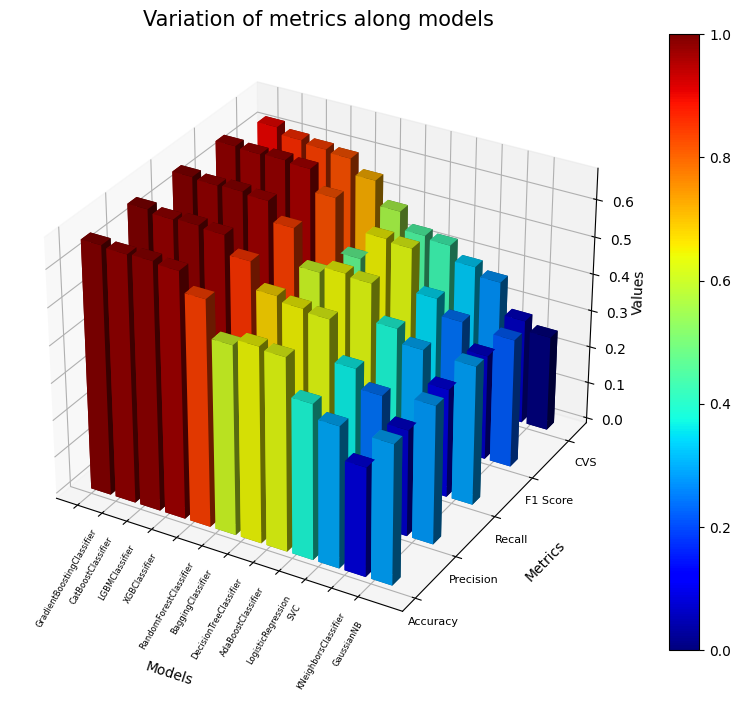

<Figure size 1500x600 with 0 Axes>

In [54]:
x = np.arange(12)
y = np.arange(5)
xpos,ypos = np.meshgrid(x,y)
z = metrics_df.to_numpy()

xpos=xpos.flatten()
ypos=ypos.flatten()
zpos=np.zeros_like(xpos)

dx=0.8*np.ones_like(xpos)
dy=0.2*np.ones_like(xpos)
dz=z.flatten()

fig=plt.figure(figsize = (11,8))
ax=fig.add_subplot(111, projection = "3d")
label = ["Values"]

ax.set_title("Variation of metrics along models", fontsize = 15)
ax.set_xticks(range(12))
ax.set_xticklabels(metrics_df.columns, fontsize = 6, rotation=60)
ax.set_xlabel("Models", labelpad=40)

ax.set_yticklabels(metrics_df.index, fontsize = 8)
ax.set_yticks(range(5))
ax.set_ylabel("Metrics",labelpad=10)

ax.set_zlabel("Values", labelpad=0)
colors = plt.cm.jet(((z.flatten() - z.min())).astype(float) / (z.max() - z.min()))

bar = ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color= colors)

plt.figure(figsize=(15,6))
fig.colorbar(plt.cm.ScalarMappable(cmap = 'jet'), ax = ax)

plt.show()

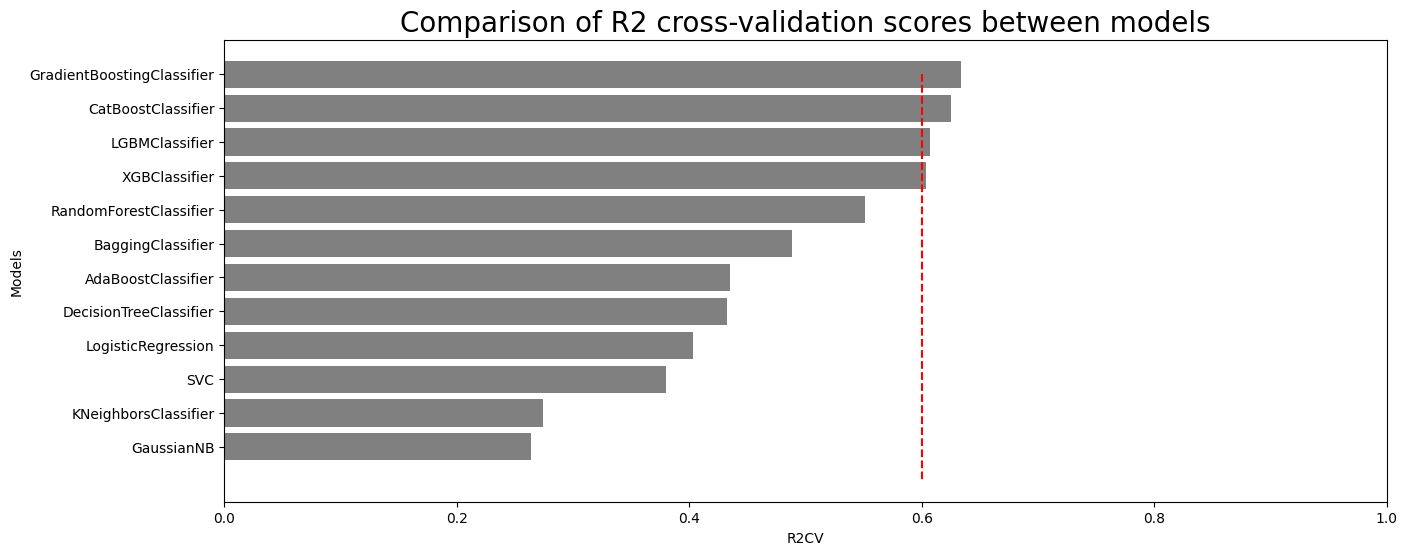

In [29]:
figure = plt.figure(figsize=(15,6))   
sns.barplot(x="R2CV", y="Models", data=results_sub_df, color="grey")
plt.xlabel("R2CV")
plt.ylabel("Models")
plt.xlim(0,1)
plt.vlines(0.6, ymin=0, ymax=12, color='red', linestyle='--')
plt.title("Comparison of R2 cross-validation scores between models", size=20)
plt.show()

# Vertical line aims to highlight the best models (R2CV >= 60%), in this case all models have R2 lower than 70%

<b>Evaluation with Confusion matrix</b>

In [30]:
gb_pred = gb.predict(X_Sub_test)

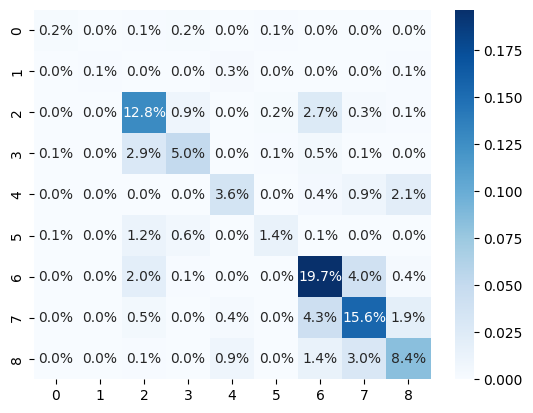

In [31]:
c_matrix = confusion_matrix(y_Sub_test, gb_pred)
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, fmt='.1%', cmap='Blues');

## Clustering

In order to improve the model a first step of clustering is going to be made before the model training and fit.

- Genetic disorder dataframe

In [45]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(Genetic_X_scaled)
                for k in range(1, 30)]
inertias = [model.inertia_ for model in kmeans_per_k]

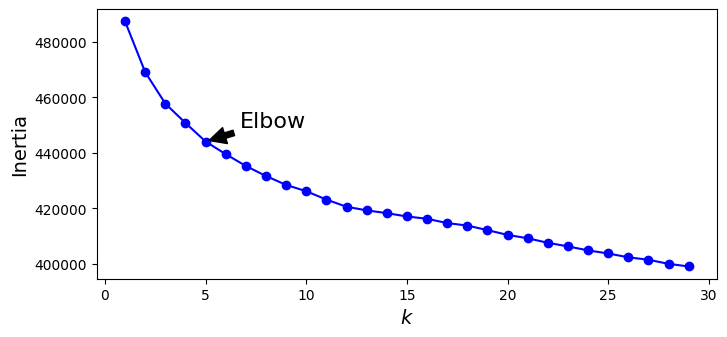

In [46]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 30), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(5, inertias[4]),
             xytext=(0.3, 0.6),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [47]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(Genetic_X_scaled)

In [48]:
silhouette_score(Genetic_X_scaled, kmeans.labels_)

0.03172582138243961

In [49]:
silhouette_scores = [silhouette_score(Genetic_X_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]

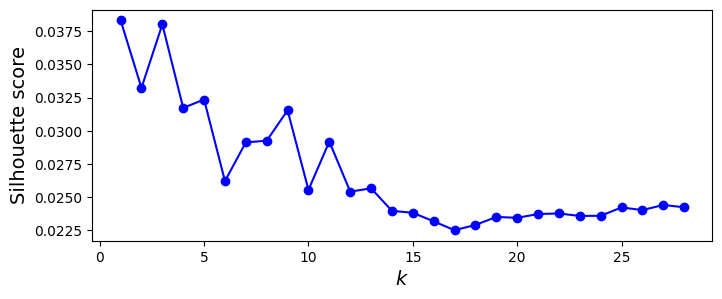

In [50]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 29), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

# The optimal number of clusters is 4 (silhouette score = 0.034)
# Right before the drop in silhouette score at 5 (even if this was the value where the elbow was found)

- Subclass dataframe

In [51]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(Subclass_X_scaled)
                for k in range(1, 30)]
inertias = [model.inertia_ for model in kmeans_per_k]

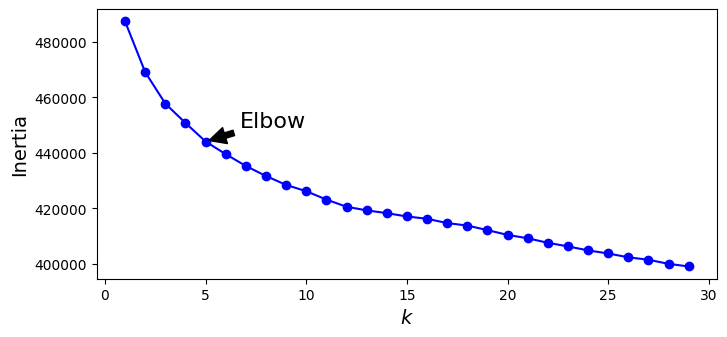

In [52]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 30), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(5, inertias[4]),
             xytext=(0.3, 0.6),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [53]:
silhouette_score(Subclass_X_scaled, kmeans.labels_)

0.03172582138243961

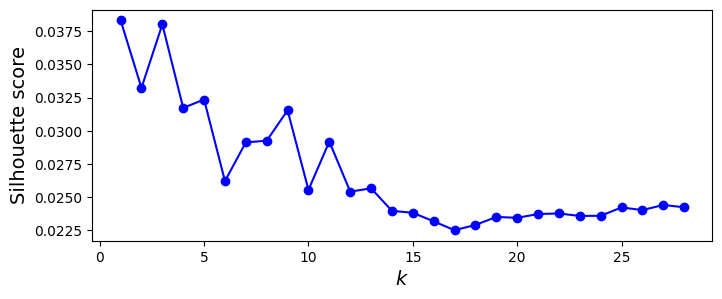

In [54]:
silhouette_scores = [silhouette_score(Subclass_X_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 29), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

# The optimal number of clusters is 4 (silhouette score = 0.034)
# Right before the drop in silhouette score at 5 (even if this was the value where the elbow was found)

### Pipeline
- Genetic Disorder

In [85]:
# Create the pipeline
pipeline_Gen = Pipeline([
    ("kmeans", KMeans(n_clusters=4, random_state=42)),
    ("gb", GradientBoostingClassifier(learning_rate=0.7, max_depth=2, max_features='auto', n_estimators=30, random_state=42)),
])

In [86]:
# Train the Genetic Disorder data with the pipeline
Gen_model = pipeline_Gen.fit(X_Gen_train, y_Gen_train)
pipeline_Gen.score(X_Gen_test, y_Gen_test)

0.5041551246537396

In [87]:
# Evaluate the pipeline model
name = "Clustering and Gradient Boosting"
prediction = Gen_model.predict(X_Gen_test)
accuracy = metrics.accuracy_score(y_Gen_test, prediction)
precision = precision_score(y_Gen_test, prediction, average="weighted")
recall = recall_score(y_Gen_test, prediction, average="weighted")
f1 = f1_score(y_Gen_test, prediction, average="weighted")
CVS = cross_val_score(Gen_model,X_Gen_test,y_Gen_test,cv=10,verbose=False).mean()

print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("Cross Validation Score mean: " + str(CVS*100))
print("--------------------------------------------------------------------------")
print("")

# Metrics dropped and are worse than doing the Gradient Boosting alone

----------------------------------
|Clustering and Gradient Boosting|
----------------------------------
Accuracy: 0.5041551246537396
Precision: 0.42787122225462726
Recall: 0.5041551246537396
F1 Score: 0.4002690954667414
Cross Validation Score mean: 49.80609418282548
--------------------------------------------------------------------------



- Subclass disorder

In [4]:
# Create the pipeline
pipeline_Sub = Pipeline([
    ("kmeans", KMeans(n_clusters=4, random_state=42)),
    ("gb", GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features='auto', n_estimators=30, random_state=42)),
])

In [ ]:
# Train the Disorder Subclass data with the pipeline
Sub_model = pipeline_Sub.fit(X_Sub_train, y_Sub_train)
pipeline_Sub.score(X_Sub_test, y_Sub_test)

# Pipeline score is really low so we can assume this model is not better

In [ ]:
# Evaluate the pipeline model
name = "Clustering and Gradient Boosting"
prediction = Sub_model.predict(X_Sub_test)
accuracy = metrics.accuracy_score(y_Sub_test, prediction)
precision = precision_score(y_Sub_test, prediction, average="weighted")
recall = recall_score(y_Sub_test, prediction, average="weighted")
f1 = f1_score(y_Sub_test, prediction, average="weighted")
R2CV = cross_val_score(Sub_model,X_Sub_test,y_Sub_test,cv=10,verbose=False).mean()

print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("R2 Cross Validation mean: " + str(R2CV*100))
print("--------------------------------------------------------------------------")
print("")
# Metrics dropped and are worse than doing the Gradient Boosting alone

Metrics have been deeply affected by clustering, so it won't be used for the final modeling

## Logarithmic transformation of specific columns prior to training

In [55]:
# Original dataframe
df_eda
# Select columns to transform
COLS_TO_TRANSFORM = ['Father_age', 'Mother_age']

# Logaritmic transformation of specific columns
for c in [c for c in df_eda.columns if df_eda[c].name in COLS_TO_TRANSFORM]:
    df_eda[c] = np.log10(df_eda[c])

df_eda.head()

Patient_Age  Mother_inherit  Father_inherit  Maternal_gene  Paternal_gene   
0          2.0             1.0             0.0            1.0            0.0  \
1          6.0             1.0             0.0            0.0            0.0   
2         12.0             1.0             0.0            1.0            0.0   
3         11.0             1.0             0.0            1.0            1.0   
4         14.0             1.0             0.0            1.0            0.0   

   Blood_cell_count  Mother_age  Father_age  Status  Respiratory_rate  ...   
0          4.760603    1.542656    1.627144     0.0               0.0  ...  \
1          4.893297    1.612784    1.342423     0.0               0.0  ...   
2          4.705280    1.322219    1.620203     1.0               1.0  ...   
3          4.720703    1.505150    1.610047     0.0               1.0  ...   
4          5.103188    1.539095    1.623410     1.0               0.0  ...   

   Birth_defects  WBC_count  Blood_test  Symptom1  Symptom2  Symptom3   
0            0.0   9.857562         3.0       1.0       1.0       1.0  \
1            1.0   7.474796         2.0       0.0       1.0       1.0   
2            1.0   7.919321         1.0       0.0       0.0       1.0   
3            0.0   4.098210         3.0       0.0       0.0       0.0   
4            0.0  10.272230         2.0       1.0       0.0       0.0   

   Symptom4  Symptom5  Genetic_disorder  Disorder_subclass  
0       1.0       1.0               0.0                5.0  
1       1.0       1.0               1.0                3.0  
2       0.0       0.0               0.0                6.0  
3       0.0       0.0               1.0                1.0  
4       1.0       0.0               2.0                2.0  

[5 rows x 29 columns]

In [56]:
# Create Genetic disorder dataframe
Genetic_disorder = df_eda.drop(["Disorder_subclass"], axis=1)

# Split target column from the rest of the columns of the Genetic_disorder dataframe
Genetic_X = Genetic_disorder.drop(["Genetic_disorder"], axis=1)
Genetic_Y = Genetic_disorder["Genetic_disorder"]

# Standardize the data
Genetic_X_scaled = StandardScaler().fit_transform(Genetic_X)

# Divide dataframe into train and test sets
X_Gen_train, X_Gen_test, y_Gen_train, y_Gen_test = train_test_split(Genetic_X_scaled, Genetic_Y, test_size=0.2, random_state=42)

In [57]:
# Create Disorder Subclass dataframe
Disorder_subclass = df_eda.drop(["Genetic_disorder"], axis=1)

# Split target column from the rest of the columns of the Disorder_subclass dataframe
Subclass_X = Disorder_subclass.drop(["Disorder_subclass"], axis=1)
Subclass_Y = Disorder_subclass["Disorder_subclass"]

# Standardize the data
Subclass_X_scaled = StandardScaler().fit_transform(Subclass_X)

# Divide dataframe into train and test sets
X_Sub_train, X_Sub_test, y_Sub_train, y_Sub_test = train_test_split(Subclass_X_scaled, Subclass_Y, test_size=0.2, random_state=42)

In [84]:
# Gradient Boosting Classifier for Genetic Disorder Dataframe with best hyperparameters
gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=2, n_estimators=10, random_state=42)
gb_Gen_model = gb.fit(X_Gen_train, y_Gen_train)

prediction = gb_Gen_model.predict(X_Gen_test)
accuracy = metrics.accuracy_score(y_Gen_test, prediction)
precision = precision_score(y_Gen_test, prediction, average="weighted")
recall = recall_score(y_Gen_test, prediction, average="weighted")
f1 = f1_score(y_Gen_test, prediction, average="weighted")
CVS = cross_val_score(gb_Gen_model,X_Gen_test,y_Gen_test,cv=10,verbose=False, scoring="r2").mean()

name = "Gradient Boosting Classifier for Genetic Disorder Dataframe"
print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("Cross Validation Score mean: " + str(CVS*100))
print("--------------------------------------------------------------------------")
print("")

# Metrics for Genetic Disorder after logarithmic transformation of specific columns are the same than without the transformation.

-------------------------------------------------------------
|Gradient Boosting Classifier for Genetic Disorder Dataframe|
-------------------------------------------------------------
Accuracy: 0.6673130193905817
Precision: 0.6358887338899177
Recall: 0.6673130193905817
F1 Score: 0.6030611336777714
Cross Validation Score mean: -16.934957057485594
--------------------------------------------------------------------------



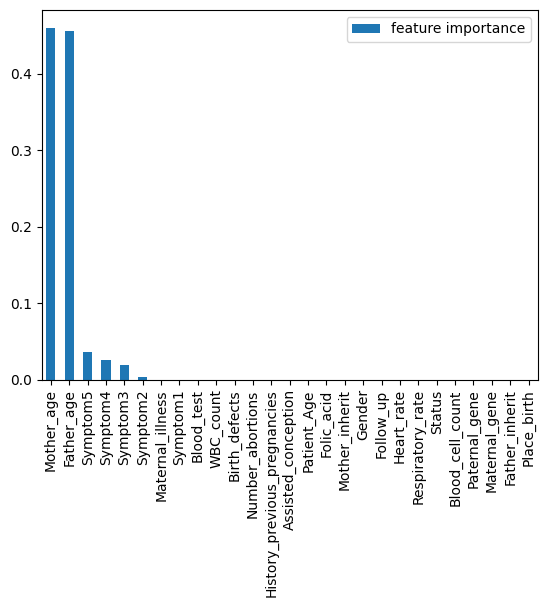

In [60]:
df_feature_importance = pd.DataFrame(gb_Gen_model.feature_importances_, index=Genetic_X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance.plot(kind='bar');

# Father and Mother's age are the top 2 features in the model, even after logarithmic transformation of those specific columns before using the StandardScaler.

In [61]:
# Gradient Boosting Classifier for Disorder Subclass Dataframe with best hyperparameters
gb = GradientBoostingClassifier(learning_rate=0.7, max_depth=2, n_estimators=30, random_state=42)
gb_Sub_model = gb.fit(X_Sub_train, y_Sub_train)

prediction = gb_Sub_model.predict(X_Sub_test)
accuracy = metrics.accuracy_score(y_Sub_test, prediction)
precision = precision_score(y_Sub_test, prediction, average="weighted")
recall = recall_score(y_Sub_test, prediction, average="weighted")
f1 = f1_score(y_Sub_test, prediction, average="weighted")
R2CV = cross_val_score(gb_Sub_model,X_Sub_test,y_Sub_test,cv=10,verbose=False).mean()

name = "Gradient Boosting Classifier for Disorder Subclass Dataframe"
print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("R2 Cross Validation mean: " + str(R2CV*100))
print("--------------------------------------------------------------------------")
print("")

# Metrics for Disorder Subclass after logarithmic transformation of specific columns are the same than without the transformation.

--------------------------------------------------------------
|Gradient Boosting Classifier for Disorder Subclass Dataframe|
--------------------------------------------------------------
Accuracy: 0.6833795013850416
Precision: 0.6875256257906608
Recall: 0.6833795013850416
F1 Score: 0.6793383345903772
R2 Cross Validation mean: 63.07479224376732
--------------------------------------------------------------------------



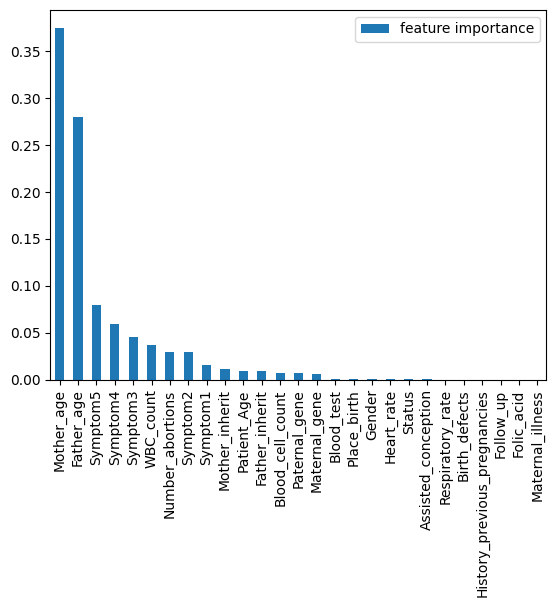

In [62]:
df_feature_importance = pd.DataFrame(gb_Sub_model.feature_importances_, index=Subclass_X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance.plot(kind='bar');
# Father and Mother's age are the top 2 features in the model, even after logarithmic transformation of those specific columns before using the StandardScaler.

## Rebalancing data
Prediction is being affected by disbalanced data. Some groups of diseases are really unfrequent in data and are hard to predict.
In order to not loose information but improving prediction, oversampling these minority groups is the key.

#### Resample

In [55]:
oversample = SMOTE()
X_Gen_res, y_Gen_res = oversample.fit_resample(X_Gen_train, y_Gen_train)
X_Sub_res, y_Sub_res = oversample.fit_resample(X_Sub_train, y_Sub_train)

In [12]:
print("Number of rows in Genetic Disorder data now: " + str(X_Gen_res.shape[0])+" vs before: " + str(y_Gen_train.shape[0]))
print("Number of rows in Disorder Subclass data now: : " + str(X_Sub_res.shape[0])+" vs before: " + str(X_Sub_train.shape[0]))

Number of rows in Genetic Disorder data now: 22062 vs before: 14437
Number of rows in Disorder Subclass data now: : 33669 vs before: 14437


Counter({0.0: 7354, 2.0: 7354, 1.0: 7354})


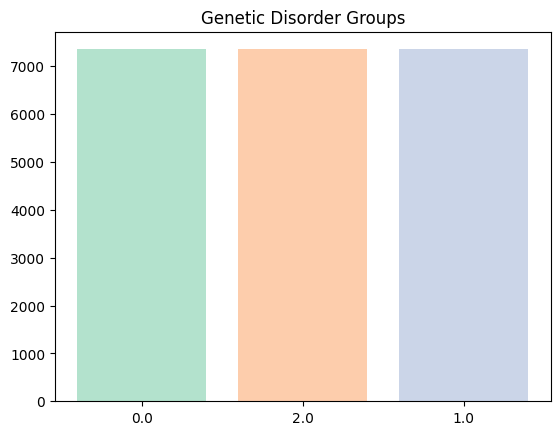

Counter({6.0: 3741, 8.0: 3741, 2.0: 3741, 7.0: 3741, 4.0: 3741, 5.0: 3741, 3.0: 3741, 0.0: 3741, 1.0: 3741})


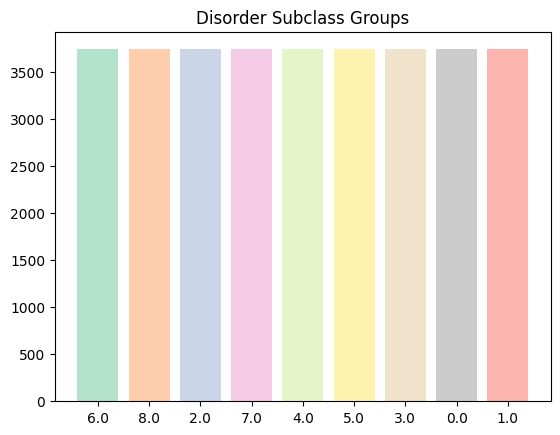

In [13]:
# summarize the new class distribution
counter = Counter(y_Gen_res)
print(counter)
# bar plot of examples by class label
plt.bar(range(len(counter)), list(counter.values()), align='center',
        color=('#b3e2cd', '#fdcdac', '#cbd5e8'))
plt.xticks(range(len(counter)), list(counter.keys()))
plt.title("Genetic Disorder Groups")
plt.show()

counter_Sub = Counter(y_Sub_res)
print(counter_Sub)
# bar plot of examples by class label
plt.bar(range(len(counter_Sub)), list(counter_Sub.values()), align='center',
        color=["#b3e2cd", "#fdcdac", "#cbd5e8", "#f4cae4", "#e6f5c9", "#fff2ae", "#f1e2cc", "#cccccc", "#fbb4ae"])
plt.xticks(range(len(counter_Sub)), list(counter_Sub.keys()))
plt.title("Disorder Subclass Groups")
plt.show()

#### Genetic disorder resampled data training

In [14]:
log.fit(X_Gen_res, y_Gen_res)
tree.fit(X_Gen_res, y_Gen_res)
knn.fit(X_Gen_res, y_Gen_res)
nb.fit(X_Gen_res, y_Gen_res)
svm.fit(X_Gen_res, y_Gen_res)
bag_clf.fit(X_Gen_res, y_Gen_res)
ada_clf.fit(X_Gen_res, y_Gen_res)
rf.fit(X_Gen_res, y_Gen_res)
gb.fit(X_Gen_res, y_Gen_res)
xgb.fit(X_Gen_res, y_Gen_res)
cat.fit(X_Gen_res, y_Gen_res)
lgb.fit(X_Gen_res, y_Gen_res)

Learning rate set to 0.092651
0:	learn: 1.0523262	total: 193ms	remaining: 3m 12s
1:	learn: 1.0141931	total: 209ms	remaining: 1m 44s
2:	learn: 0.9780249	total: 224ms	remaining: 1m 14s
3:	learn: 0.9527706	total: 239ms	remaining: 59.6s
4:	learn: 0.9198555	total: 255ms	remaining: 50.7s
5:	learn: 0.8982257	total: 272ms	remaining: 45.1s
6:	learn: 0.8743082	total: 291ms	remaining: 41.3s
7:	learn: 0.8494130	total: 310ms	remaining: 38.5s
8:	learn: 0.8345859	total: 330ms	remaining: 36.4s
9:	learn: 0.8177728	total: 348ms	remaining: 34.5s
10:	learn: 0.8031645	total: 365ms	remaining: 32.8s
11:	learn: 0.7912414	total: 385ms	remaining: 31.7s
12:	learn: 0.7792429	total: 407ms	remaining: 30.9s
13:	learn: 0.7679407	total: 427ms	remaining: 30.1s
14:	learn: 0.7548276	total: 450ms	remaining: 29.5s
15:	learn: 0.7461802	total: 471ms	remaining: 29s
16:	learn: 0.7344478	total: 492ms	remaining: 28.4s
17:	learn: 0.7280694	total: 514ms	remaining: 28.1s
18:	learn: 0.7187060	total: 534ms	remaining: 27.6s
19:	learn:

LGBMClassifier(random_state=42)

In [20]:
lst_models = []
lst_accuracy = []
lst_precision = []
lst_recall = []
lst_f1 = []
lst_cvs = []


for model in models:
    name = model.__class__.__name__
    prediction = model.predict(X_Gen_test)
    accuracy = metrics.accuracy_score(y_Gen_test, prediction)
    precision = precision_score(y_Gen_test, prediction, average="weighted")
    recall = recall_score(y_Gen_test, prediction, average="weighted")
    f1 = f1_score(y_Gen_test, prediction, average="weighted")
    CVS = cross_val_score(model,X_Gen_test,y_Gen_test,cv=10,verbose=False).mean()

    lst_models.append(name)
    lst_accuracy.append(accuracy)
    lst_precision.append(precision)
    lst_recall.append(recall)
    lst_f1.append(f1)
    lst_cvs.append(CVS)
    
    print("-"*(len(name)+2))
    print("|"+ name + "|")
    print("-"*(len(name)+2))
    print("Accuracy: " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))
    print("F1 Score: " + str(f1))
    print("Cross Validation Score mean: " + str(CVS*100))
    print("--------------------------------------------------------------------------")
    print("")


--------------------
|LogisticRegression|
--------------------
Accuracy: 0.43656509695290857
Precision: 0.5033588269277804
Recall: 0.43656509695290857
F1 Score: 0.4423944473270965
Cross Validation Score mean: 52.714681440443215
--------------------------------------------------------------------------

------------------------
|DecisionTreeClassifier|
------------------------
Accuracy: 0.6246537396121884
Precision: 0.6369201604742146
Recall: 0.6246537396121884
F1 Score: 0.6294294867221278
Cross Validation Score mean: 65.34626038781164
--------------------------------------------------------------------------

----------------------
|KNeighborsClassifier|
----------------------
Accuracy: 0.4085872576177285
Precision: 0.4751059287475582
Recall: 0.4085872576177285
F1 Score: 0.42407272527389234
Cross Validation Score mean: 49.61218836565096
--------------------------------------------------------------------------

------------
|GaussianNB|
------------
Accuracy: 0.44265927977839337
Precis

In [23]:
results_df = pd.DataFrame([lst_models, lst_accuracy, lst_precision, lst_recall,
lst_f1, lst_cvs]).T.rename(columns={0: "Models", 1: "Accuracy", 2: "Precision", 3: "Recall", 4: "F1 Score", 5: "CVS"})
for col in ["Accuracy", "Precision", "Recall", "F1 Score", "CVS"]:
    results_df[col] = results_df[col].astype(float)

results_df.sort_values(by="CVS", inplace=True, ascending=False)
results_df

Models  Accuracy  Precision    Recall  F1 Score   
8   GradientBoostingClassifier  0.744598   0.752201  0.744598  0.740712  \
10          CatBoostClassifier  0.761773   0.760928  0.761773  0.760333   
9                XGBClassifier  0.762881   0.761268  0.762881  0.761024   
11              LGBMClassifier  0.775900   0.777846  0.775900  0.773024   
7       RandomForestClassifier  0.712742   0.716374  0.712742  0.711271   
5            BaggingClassifier  0.598338   0.622766  0.598338  0.601567   
6           AdaBoostClassifier  0.629363   0.641235  0.629363  0.634044   
1       DecisionTreeClassifier  0.624654   0.636920  0.624654  0.629429   
4                          SVC  0.551247   0.548537  0.551247  0.540654   
0           LogisticRegression  0.436565   0.503359  0.436565  0.442394   
3                   GaussianNB  0.442659   0.491526  0.442659  0.448364   
2         KNeighborsClassifier  0.408587   0.475106  0.408587  0.424073   

         CVS  
8   0.733795  
10  0.724100  
9   0.722992  
11  0.721053  
7   0.701108  
5   0.672853  
6   0.660111  
1   0.653463  
4   0.547368  
0   0.527147  
3   0.524931  
2   0.496122

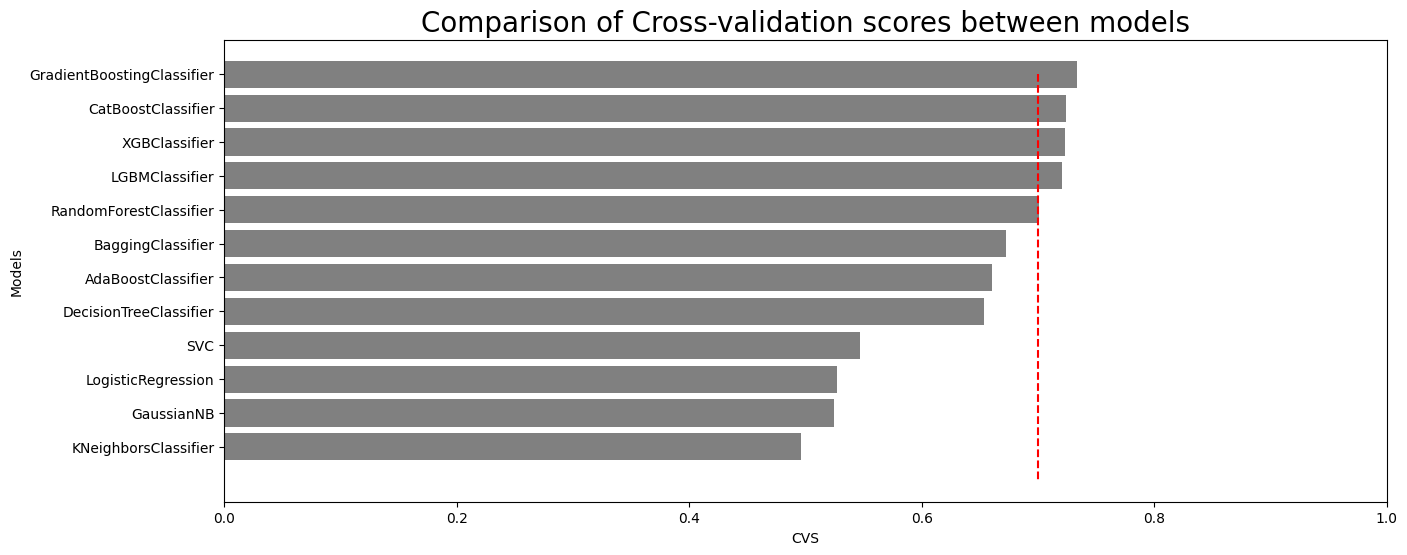

In [24]:
figure = plt.figure(figsize=(15,6))   
sns.barplot(x="CVS", y="Models", data=results_df, color="grey")
plt.xlabel("CVS")
plt.ylabel("Models")
plt.xlim(0,1)
plt.vlines(0.7, ymin=0, ymax=12, color='red', linestyle='--')
plt.title("Comparison of Cross-validation scores between models", size=20)
plt.show()

# Vertical line aims to highlight the best models (R2CV >= 70%)

In [26]:
gb_pred = gb.predict(X_Gen_test)

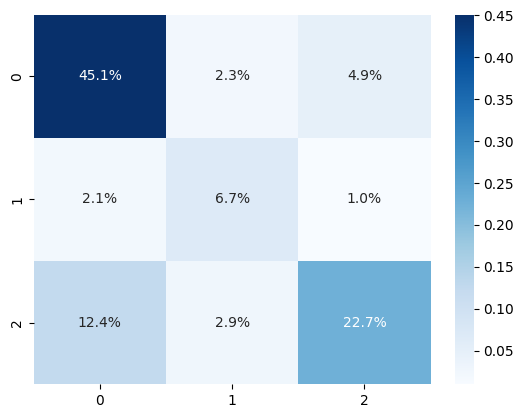

In [27]:
c_matrix = confusion_matrix(y_Gen_test, gb_pred)
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, fmt='.1%', cmap='Blues');

#### Disorder subclass resampled data training

In [70]:
log.fit(X_Sub_res, y_Sub_res)
tree.fit(X_Sub_res, y_Sub_res)
knn.fit(X_Sub_res, y_Sub_res)
nb.fit(X_Sub_res, y_Sub_res)
svm.fit(X_Sub_res, y_Sub_res)
bag_clf.fit(X_Sub_res, y_Sub_res)
ada_clf.fit(X_Sub_res, y_Sub_res)
rf.fit(X_Sub_res, y_Sub_res)
gb.fit(X_Sub_res, y_Sub_res)
xgb.fit(X_Sub_res, y_Sub_res)
cat.fit(X_Sub_res, y_Sub_res)
lgb.fit(X_Sub_res, y_Sub_res)

Learning rate set to 0.09467
0:	learn: 2.0466091	total: 191ms	remaining: 3m 10s
1:	learn: 1.9305205	total: 355ms	remaining: 2m 57s
2:	learn: 1.8439499	total: 521ms	remaining: 2m 53s
3:	learn: 1.7730599	total: 681ms	remaining: 2m 49s
4:	learn: 1.7097151	total: 838ms	remaining: 2m 46s
5:	learn: 1.6580680	total: 995ms	remaining: 2m 44s
6:	learn: 1.6091939	total: 1.15s	remaining: 2m 42s
7:	learn: 1.5697292	total: 1.28s	remaining: 2m 38s
8:	learn: 1.5343242	total: 1.45s	remaining: 2m 39s
9:	learn: 1.5029870	total: 1.58s	remaining: 2m 36s
10:	learn: 1.4759388	total: 1.73s	remaining: 2m 35s
11:	learn: 1.4465234	total: 1.86s	remaining: 2m 33s
12:	learn: 1.4237345	total: 2.01s	remaining: 2m 32s
13:	learn: 1.4040477	total: 2.15s	remaining: 2m 31s
14:	learn: 1.3823945	total: 2.28s	remaining: 2m 29s
15:	learn: 1.3637030	total: 2.4s	remaining: 2m 27s
16:	learn: 1.3385041	total: 2.54s	remaining: 2m 26s
17:	learn: 1.3154507	total: 2.66s	remaining: 2m 25s
18:	learn: 1.2972196	total: 2.79s	remaining: 2

LGBMClassifier(random_state=42)

In [58]:
lst_sub_models = []
lst_sub_accuracy = []
lst_sub_precision = []
lst_sub_recall = []
lst_sub_f1 = []
lst_sub_cvs = []


for model in models:
    name = model.__class__.__name__
    prediction = model.predict(X_Sub_test)
    accuracy = metrics.accuracy_score(y_Sub_test, prediction)
    precision = precision_score(y_Sub_test, prediction, average="weighted")
    recall = recall_score(y_Sub_test, prediction, average="weighted")
    f1 = f1_score(y_Sub_test, prediction, average="weighted")
    CVS = cross_val_score(model,X_Sub_test,y_Sub_test,cv=10,verbose=False).mean()
   
    lst_sub_models.append(name)
    lst_sub_accuracy.append(accuracy)
    lst_sub_precision.append(precision)
    lst_sub_recall.append(recall)
    lst_sub_f1.append(f1)
    lst_sub_cvs.append(CVS)
    
    print("-"*(len(name)+2))
    print("|"+ name + "|")
    print("-"*(len(name)+2))
    print("Accuracy: " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))
    print("F1 Score: " + str(f1))
    print("Cross Validation Score mean: " + str(CVS*100))
    print("--------------------------------------------------------------------------")
    print("")

--------------------
|LogisticRegression|
--------------------
Accuracy: 0.32825484764542934
Precision: 0.36271495596574577
Recall: 0.32825484764542934
F1 Score: 0.33844207794030534
Cross Validation Score mean: 39.252077562326875
--------------------------------------------------------------------------

------------------------
|DecisionTreeClassifier|
------------------------
Accuracy: 0.4102493074792244
Precision: 0.4167273930742073
Recall: 0.4102493074792244
F1 Score: 0.4125897706489396
Cross Validation Score mean: 44.04432132963989
--------------------------------------------------------------------------

----------------------
|KNeighborsClassifier|
----------------------
Accuracy: 0.20720221606648198
Precision: 0.27254663381611866
Recall: 0.20720221606648198
F1 Score: 0.2136621776274178
Cross Validation Score mean: 28.254847645429358
--------------------------------------------------------------------------

------------
|GaussianNB|
------------
Accuracy: 0.3008310249307479
Pr

In [59]:
results_sub_df = pd.DataFrame([lst_sub_models, lst_sub_accuracy, lst_sub_precision, lst_sub_recall,
lst_sub_f1, lst_sub_cvs]).T.rename(columns={0: "Models", 1: "Accuracy", 2: "Precision", 3: "Recall", 4: "F1 Score", 5: "CVS"})
for col in ["Accuracy", "Precision", "Recall", "F1 Score", "CVS"]:
    results_df[col] = results_df[col].astype(float)

results_sub_df.sort_values(by="CVS", inplace=True, ascending=False)
results_sub_df

Models  Accuracy Precision    Recall  F1 Score   
8   GradientBoostingClassifier  0.636011   0.63894  0.636011  0.637047  \
10          CatBoostClassifier  0.641274  0.638469  0.641274  0.639056   
11              LGBMClassifier   0.64072   0.63915   0.64072  0.639366   
9                XGBClassifier  0.629363  0.626832  0.629363  0.627423   
7       RandomForestClassifier  0.524377  0.520413  0.524377  0.520667   
5            BaggingClassifier  0.296953  0.329618  0.296953  0.305531   
1       DecisionTreeClassifier  0.410249  0.416727  0.410249   0.41259   
6           AdaBoostClassifier  0.407202  0.415127  0.407202  0.410036   
0           LogisticRegression  0.328255  0.362715  0.328255  0.338442   
4                          SVC  0.344598   0.34521  0.344598  0.344357   
2         KNeighborsClassifier  0.207202  0.272547  0.207202  0.213662   
3                   GaussianNB  0.300831  0.343408  0.300831  0.314554   

         CVS  
8   0.628809  
10  0.610803  
11   0.60277  
9   0.595845  
7   0.554017  
5   0.488089  
1   0.440443  
6    0.43241  
0   0.392521  
4   0.369252  
2   0.282548  
3   0.257064

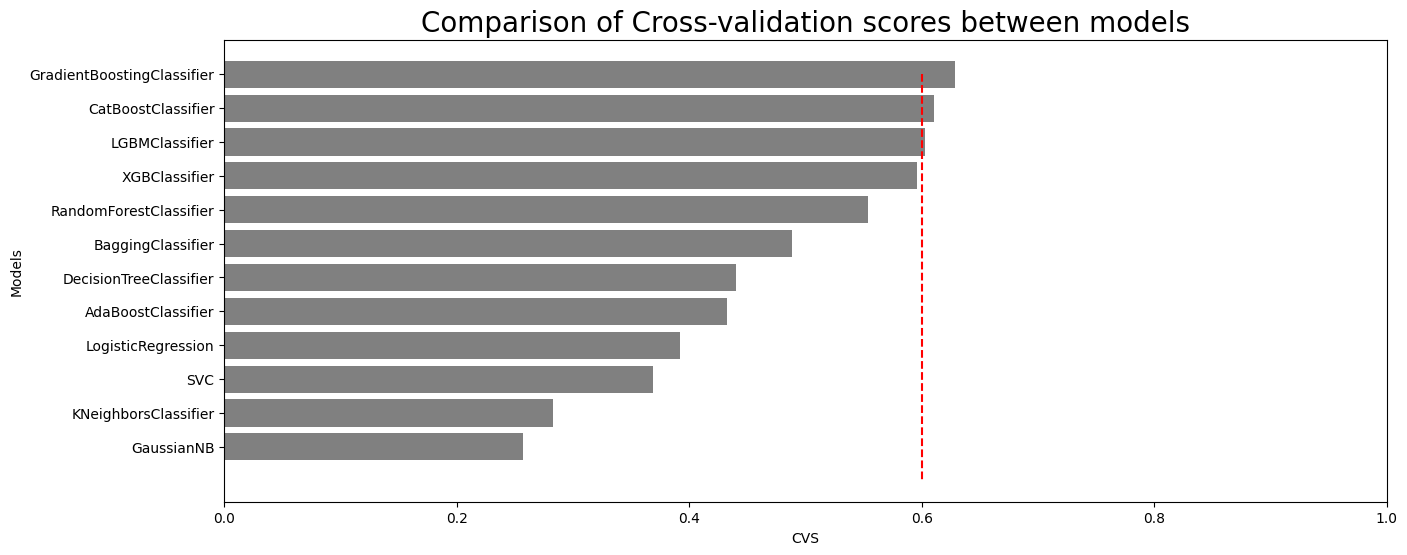

In [60]:
figure = plt.figure(figsize=(15,6))
sns.barplot(x="CVS", y="Models", data=results_sub_df, color="grey")
plt.xlabel("CVS")
plt.ylabel("Models")
plt.xlim(0,1)
plt.vlines(0.6, ymin=0, ymax=12, color='red', linestyle='--')
plt.title("Comparison of Cross-validation scores between models", size=20)
plt.show()

# Vertical line aims to highlight the best models (CVS >= 60%), in this case all models have R2 lower than 70%

In [61]:
gb_pred = gb.predict(X_Sub_test)

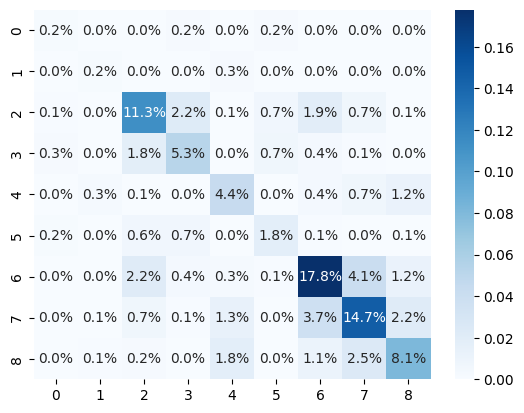

In [62]:
c_matrix = confusion_matrix(y_Sub_test, gb_pred)
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, fmt='.1%', cmap='Blues');

## GridSearch

Tune the model in order to find the best hyperparameters

In [20]:
param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'learning_rate': [0.05, 0.1, 0.5],
    'max_depth': [1, 3, 5]
}

In [ ]:
pipeline_Gen = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=42))
    ])

#### Genetic disorder dataframe

In [21]:
grid_search = GridSearchCV(gb, param_grid, cv=10)

grid_search.fit(X_Gen_res, y_Gen_res)
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [23]:
# Gradient Boosting Classifier for Genetic Disorder Dataframe with best hyperparameters
gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=42)
gb_Gen_model = gb.fit(X_Gen_res, y_Gen_res)

prediction = gb_Gen_model.predict(X_Gen_test)
accuracy = metrics.accuracy_score(y_Gen_test, prediction)
precision = precision_score(y_Gen_test, prediction, average="weighted")
recall = recall_score(y_Gen_test, prediction, average="weighted")
f1 = f1_score(y_Gen_test, prediction, average="weighted")
CVS = cross_val_score(gb_Gen_model,X_Gen_test,y_Gen_test,cv=10,verbose=False).mean()

name = "Gradient Boosting Classifier for Genetic Disorder Dataframe"
print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("Cross Validation Score mean: " + str(CVS*100))
print("--------------------------------------------------------------------------")
print("")

-------------------------------------------------------------
|Gradient Boosting Classifier for Genetic Disorder Dataframe|
-------------------------------------------------------------
Accuracy: 0.7700831024930748
Precision: 0.7736334425929536
Recall: 0.7700831024930748
F1 Score: 0.7673553693989174
Cross Validation Score mean: 72.65927977839335
--------------------------------------------------------------------------



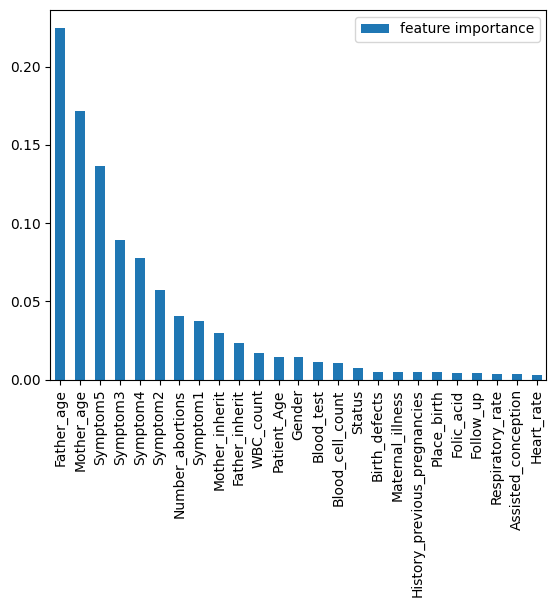

In [24]:
df_feature_importance = pd.DataFrame(gb_Gen_model.feature_importances_, index=Genetic_X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance.plot(kind='bar');

#### Subclass disorder dataframe

In [69]:
param_grid2 = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.1, 0.3],
    'max_depth': [3, 5]
}

In [73]:
grid_search = GridSearchCV(gb, param_grid2, cv=5)

grid_search.fit(X_Sub_res, y_Sub_res)
grid_search.best_params_

KeyboardInterrupt: 

In [66]:
# Gradient Boosting Classifier for Disorder Subclass Dataframe with best hyperparameters
gb = GradientBoostingClassifier(learning_rate=0.7, max_depth=2, n_estimators=30, random_state=42)
gb_Sub_model = gb.fit(X_Sub_res, y_Sub_res)

prediction = gb_Sub_model.predict(X_Sub_test)
accuracy = metrics.accuracy_score(y_Sub_test, prediction)
precision = precision_score(y_Sub_test, prediction, average="weighted")
recall = recall_score(y_Sub_test, prediction, average="weighted")
f1 = f1_score(y_Sub_test, prediction, average="weighted")
CVS = cross_val_score(gb_Sub_model,X_Sub_test,y_Sub_test,cv=10,verbose=False).mean()

name = "Gradient Boosting Classifier for Disorder Subclass Dataframe"
print("-"*(len(name)+2))
print("|"+ name + "|")
print("-"*(len(name)+2))
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("Cross Validation Score mean: " + str(CVS*100))
print("--------------------------------------------------------------------------")
print("")

--------------------------------------------------------------
|Gradient Boosting Classifier for Disorder Subclass Dataframe|
--------------------------------------------------------------
Accuracy: 0.6268698060941829
Precision: 0.6265234193943495
Recall: 0.6268698060941829
F1 Score: 0.6264602018282265
Cross Validation Score mean: 62.603878116343495
--------------------------------------------------------------------------



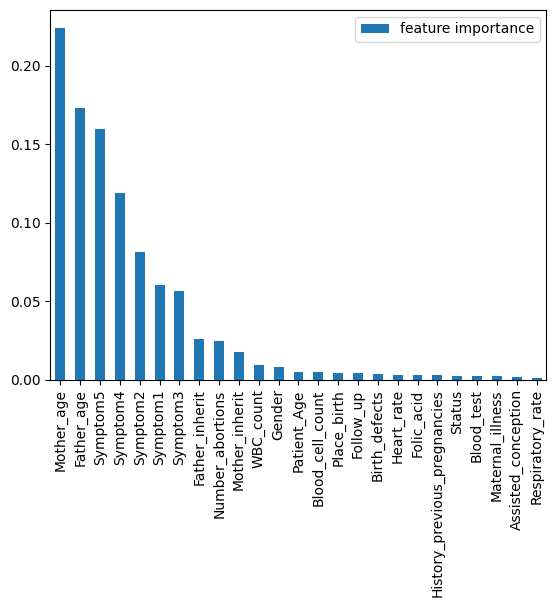

In [67]:
df_feature_importance = pd.DataFrame(gb_Sub_model.feature_importances_, index=Subclass_X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance.plot(kind='bar');

# Definitive model

In [63]:
# Since none of the latter models were performing better than the Gradient Boosting model, those are going to be save
Gen_model_def = gb_Gen_model

In [64]:
Sub_model_def = gb_Sub_model

- Save the model

In [ ]:
with open('../model/genetic_model_def.pkl', 'wb') as f:
    pickle.dump(Gen_model_def, f)

In [65]:
with open('../model/subclass_model_def.pkl', 'wb') as f:
    pickle.dump(Sub_model_def, f)